In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


Importing necessary libraries importing mnist databset defining train dataset and test dataset split is not necessary as mnist imported from tensorflow already has a split. We can use from sklearn.model_selection import train_test_split and define the slpit by test_size=0.2(20% for testing) or KFold(in case sample is small)

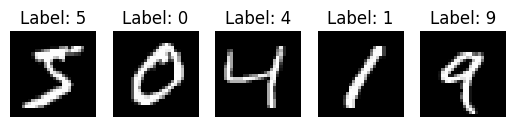

In [ ]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

element in training array are observed by plotting digit images and their labels.

In [ ]:
X_train = X_train / 255.0 # normalization to scale them to range 0-1 helps model learn better
X_test = X_test / 255.0

# Reshape the images to add a channel dimension
X_train = X_train.reshape(-1, 28, 28, 1) #the model expects an extra "channel" dimension. For grayscale images this is 1.
X_test = X_test.reshape(-1, 28, 28, 1)

print(f"New training data shape: {X_train.shape}")
print(f"New testing data shape: {X_test.shape}")


New training data shape: (60000, 28, 28, 1)
New testing data shape: (10000, 28, 28, 1)


Normalizing the pixel values from range 0-255 to 0-1, helps the model learn better. Reshaping the images to add a channel(color) dimension.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential([
    Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)), #32 filters that will scan the image,(3,3) matrix that slides over image,relu to introduce nonlinearity, helps learn complex patterns,input shape(height,width,no. of channel)
    MaxPooling2D((2,2)),#Reduces the spatial dimensions (height and width) by a factor of 2,controls overfitting and complexity
    Flatten(),
    Dense(128, activation='relu'),# 128 common choise for capturing patterns after convolutional layers
    Dense(10, activation='softmax')#10 corresponds to classes in MNIST dataset(0-9),softmax converts raw model outputs into probabilities summing to 1.
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Building a basic convolutional neural network (CNN), Sequential: stack layers to build model , Layers are: Conv2D (for 2D input like images),MaxPooling2D(Downsamples the input),Flatten(input to 1D),Dense(Fully connected neural network layer). adam: adaptive learning rate optimization algorithm widely used, loss function: the one used is appropriate when labels are int and calculates cross-entropy loss between labels and predictions, metric tracks accuracy during training and evaluation.

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1, batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9978 - loss: 0.0062 - val_accuracy: 0.9888 - val_loss: 0.0543
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9985 - loss: 0.0046 - val_accuracy: 0.9893 - val_loss: 0.0616
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9993 - loss: 0.0022 - val_accuracy: 0.9870 - val_loss: 0.0719
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9983 - loss: 0.0048 - val_accuracy: 0.9877 - val_loss: 0.0788
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9990 - loss: 0.0031 - val_accuracy: 0.9858 - val_loss: 0.0820
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9775 - loss: 0.0994
Test Accuracy: 0.98


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


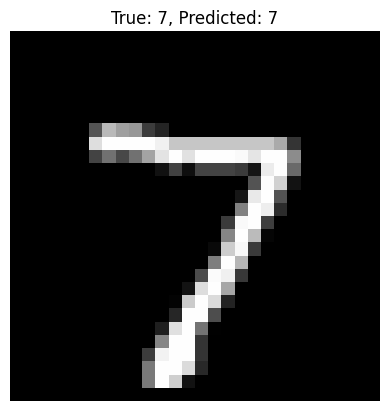

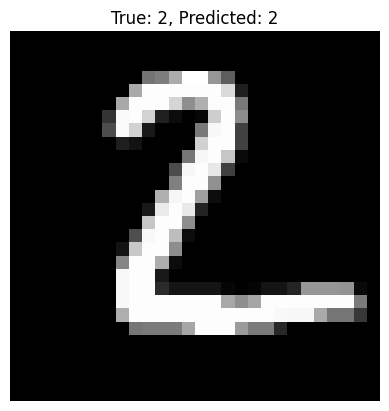

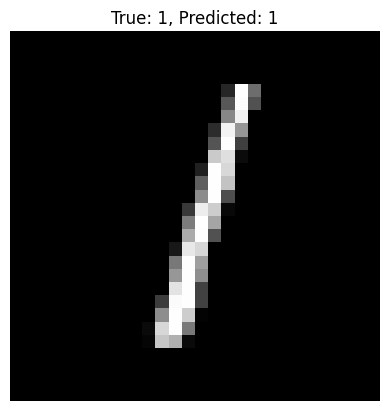

In [ ]:
predictions = model.predict(X_test[:3])

for i in range(3):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}, Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()


In [ ]:
model.save('mnist_model.keras')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.95      1.00      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.98      0.98       892
           6       0.97      0.99      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Accuracy: 98.23%


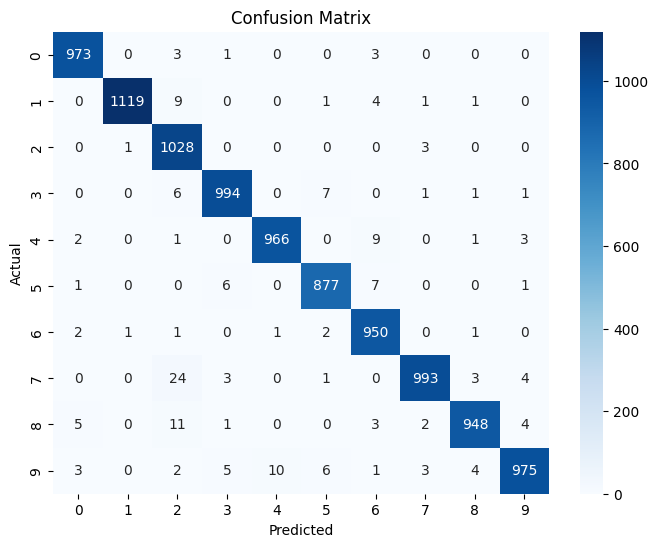

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming model is trained
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels

# Print classification report
print(classification_report(y_test, y_pred_classes))

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
